In [10]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
session = fastf1.get_session(2023, 'Monza', 'Q')

In [11]:
session.load(telemetry=True, laps=True, weather=False)

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '63', '11', '23', '81', '44', '4', '14', '22', '40', '27', '77', '2', '24', '10', '31', '20', '18']


In [103]:
laps = session.laps
drivers = session.drivers
circuit_info = session.get_circuit_info()
corners_df = circuit_info.corners

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [122]:
track = pd.DataFrame(pos.loc[:, ('X', 'Y')].to_numpy())

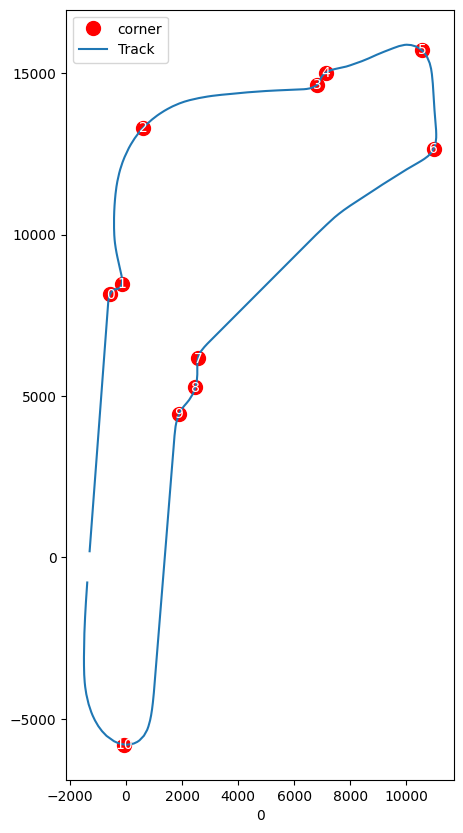

In [155]:
ax = corners_df.plot('X','Y',style = 'o',color = 'red',ms = 10,label = 'corner',figsize = (5,10))
for i, txt in enumerate(corners_df.index):
    ax.annotate(txt, (corners_df['X'][i], corners_df['Y'][i]),ha = 'center', va = 'center',color = 'white')
track.plot(x=0, y=1, ax=ax,label = 'Track');


In [16]:
test = dict()
for i in drivers:
    test[i] = laps.pick_driver(i).pick_lap(1).get_telemetry()1

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [17]:
modified_dfs = []

# Iterate through the dictionary
for key, df in test.items():
    # Replicate the key as a new column for all rows in the dataframe
    df['driver'] = key
    # Append the modified dataframe to the list
    modified_dfs.append(df)

# Concatenate all modified dataframes into a single dataframe
concatenated_df = pd.concat(modified_dfs)

# Reset index if needed
concatenated_df.reset_index(drop=True, inplace=True)

In [157]:
corners_df

,X,Y,Number,Letter,Angle,Distance
0,-569.580505,8153.724609,1,,153.787332,881.975520
1,-146.754578,8474.981445,2,,-13.835843,941.391044
2,611.600159,13310.620117,3,,133.028518,1460.094440
3,6808.655273,14630.753906,4,,-54.042256,2104.877790
4,7130.872070,15023.123047,5,,121.752858,2163.966129
5,10554.856445,15713.804688,6,,54.641655,2527.307783
6,10972.642578,12648.357422,7,,-29.053283,2838.605952
7,2562.920166,6171.023438,8,,163.072861,3902.570439
8,2478.041504,5270.562012,9,,-21.066696,4014.022435
9,1890.108276,4451.185547,10,,152.544441,4104.886823


In [188]:
concatenated_df['Distance_to_corner'] = np.sqrt((concatenated_df['X'] - corners_df['X'].iloc[10]) ** 2 + (concatenated_df['Y'] - corners_df['Y'].iloc[10]) ** 2)

threshold_distance = 500  

filtered_df = concatenated_df[concatenated_df['Distance_to_corner'] < threshold_distance]


In [189]:
plot_test = filtered_df[['X','Y','driver']].reset_index(drop = True)

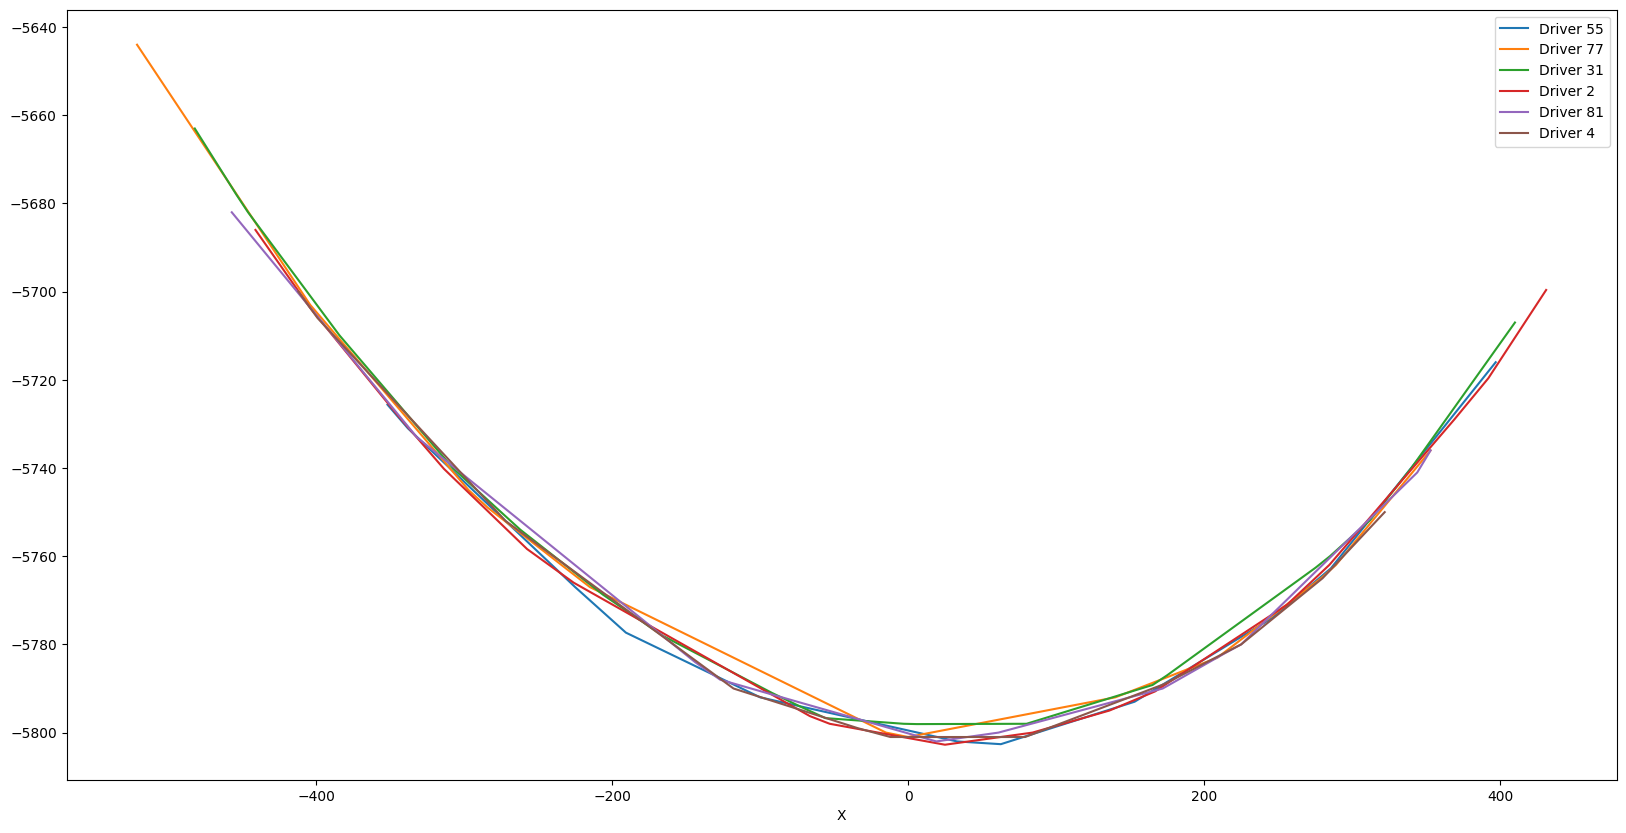

In [190]:
ax = plot_test[plot_test['driver'] == '55'].plot(x = 'X', y = 'Y', label = 'Driver 55',figsize = (2,2))
def plot_multiple(driver):
    plot_test[plot_test['driver'] == driver].plot(x = 'X', y = 'Y', ax=ax, label = f'Driver {driver}',figsize = (20,10));
for i in list(set(plot_test['driver']))[:5]:
    plot_multiple(i)